# ***Task 1***
Implement a basic CNN model from scratch using TensorFlow for image classification. In our dataset, we have 3 classes of digits which are 0, 1 and 2.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import numpy as np
import os

In [3]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

In [4]:
# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/data_assign_2/hand_written_digits"

In [5]:
# Define image size and batch size
img_size = (100, 100)
batch_size = 32

In [6]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,  # false because the numbers cant be flipped, they'll become somthing else
    vertical_flip=False  # false because the numbers cant be flipped
)

In [7]:
# Load and split the dataset
dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 4658 images belonging to 3 classes.


In [8]:
# Extract data and labels from the generator
X = []
y = []

for _ in range(len(dataset)):
    batch = next(dataset)
    X.append(batch[0])
    y.append(batch[1])

# Concatenate batches into arrays
X = np.concatenate(X)
y = np.concatenate(y)

In [9]:
#split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define the CNN model
model = models.Sequential()
#first convolution layer
model.add(layers.Conv2D(24, (5, 5), activation='relu', input_shape=(100, 100, 3)))
#max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
#2nd convolution layer
model.add(layers.Conv2D(12, (5, 5), activation='relu'))
#maxpooling layer
model.add(layers.MaxPooling2D((4, 4)))
#flatten
model.add(layers.Flatten())
#fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes: 0, 1, 2

In [37]:
#Run this cell if you want to have another model instead of the above given cell
###EXPERIMENT
#Define the CNN model
#experimenting if another model is given the same dataset
#experimenting with second architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes: 0, 1, 2

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
#model.fit(dataset, epochs=10, validation_split=0.2)
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
117/117 [==============================] - 7s 20ms/step - loss: 0.3570 - accuracy: 0.8478 - val_loss: 0.0991 - val_accuracy: 0.9732
Epoch 2/10
117/117 [==============================] - 1s 9ms/step - loss: 0.0758 - accuracy: 0.9764 - val_loss: 0.1016 - val_accuracy: 0.9710
Epoch 3/10
117/117 [==============================] - 1s 9ms/step - loss: 0.0493 - accuracy: 0.9817 - val_loss: 0.1344 - val_accuracy: 0.9646
Epoch 4/10
117/117 [==============================] - 1s 9ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0551 - val_accuracy: 0.9871
Epoch 5/10
117/117 [==============================] - 1s 9ms/step - loss: 0.0129 - accuracy: 0.9952 - val_loss: 0.0653 - val_accuracy: 0.9839
Epoch 6/10
117/117 [==============================] - 1s 9ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0628 - val_accuracy: 0.9861
Epoch 7/10
117/117 [==============================] - 1s 9ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.1035 - val_accuracy: 0.9807
Epoch

In [14]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

30/30 [==============================] - 0s 5ms/step - loss: 0.0766 - accuracy: 0.9882
Validation Accuracy: 98.82%


# ***Task 2***
Now Doing Task 1 by fine tuning a pretrained model in this case we are using MobileNet V2

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, applications
import numpy as np
import os

In [16]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

In [17]:
# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/data_assign_2/hand_written_digits"

In [18]:
# Define image size and batch size
img_size = (100, 100)
batch_size = 32

In [19]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,  # Adjusted as needed
    vertical_flip=False  # Adjusted as needed
)

In [20]:
# Load and split the dataset
dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 4658 images belonging to 3 classes.


In [21]:
# Extract data and labels from the generator
X = []
y = []

for _ in range(len(dataset)):
    batch = next(dataset)
    X.append(batch[0])
    y.append(batch[1])

# Concatenate batches into arrays
X = np.concatenate(X)
y = np.concatenate(y)

In [22]:
#split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Load pre-trained MobileNetV2 model without top (classification) layer
base_model = applications.MobileNetV2(input_shape=(100, 100, 3),
                                      include_top=False,
                                      weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [24]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [25]:
# Add custom classification layers
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
117/117 [==============================] - 9s 41ms/step - loss: 0.0693 - accuracy: 0.9764 - val_loss: 0.0306 - val_accuracy: 0.9914
Epoch 2/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0245 - accuracy: 0.9906 - val_loss: 0.0389 - val_accuracy: 0.9882
Epoch 3/10
117/117 [==============================] - 2s 16ms/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 4/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0290 - val_accuracy: 0.9903
Epoch 5/10
117/117 [==============================] - 2s 16ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0240 - val_accuracy: 0.9914
Epoch 6/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0018 - accuracy: 0.9989 - val_loss: 0.0284 - val_accuracy: 0.9903
Epoch 7/10
117/117 [==============================] - 2s 21ms/step - loss: 5.6505e-04 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.

In [28]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

30/30 [==============================] - 1s 19ms/step - loss: 0.0300 - accuracy: 0.9914
Validation Accuracy: 99.14%


# ***Task 3***
Building an Image Retrieval System using Convolutional Neural Networks


In [29]:
pip install tensorflow scikit-learn Pillow

In [30]:
pip install matplotlib

In [31]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

the below code works fine but doesnot show the actual images that is used for query images and similar images from data set

In [32]:
#function for loading images
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append((filename, img_array))
    return images

#function for extracting features
def extract_features(model, images):
    features = []
    for img_name, img_array in tqdm(images, desc="Extracting features"):
        img_array = np.expand_dims(img_array, axis=0)
        img_features = model.predict(img_array)
        features.append((img_name, img_features.flatten()))
    return features

#function for finding simlar images in dataset
def find_similar_images(query_features, database_features, top_n=4):
    distances = euclidean_distances([query_features], [f[1] for f in database_features])[0]
    indices = np.argsort(distances)[:top_n]
    return [database_features[i][0] for i in indices]

#loading VGG16
def main():
    # Load pre-trained VGG16 model
    base_model = VGG16(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

    # Load images from the query_images and images_database folders
    query_images = load_images("/content/drive/MyDrive/data_assign_2/query_images")
    database_images = load_images("/content/drive/MyDrive/data_assign_2/images_retreival_local_database")

    # Extract features using the pre-trained model
    query_features = extract_features(model, query_images)
    database_features = extract_features(model, database_images)

    # Select a query image (for demonstration purposes, using the first query image)
    query_index = 0
    query_image_name = query_features[query_index][0]

    # Find similar images
    similar_image_names = find_similar_images(query_features[query_index][1], database_features)

    # Display results
    print(f"\nQuery Image: {query_image_name}")
    print("Top 4 Similar Images:")
    for i, image_name in enumerate(similar_image_names, start=1):
        print(f"{i}. {image_name}")


if __name__ == "__main__":
    main()

553467096/553467096 [==============================] - 2s 0us/step


Extracting features:   0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


Extracting features:  17%|█▋        | 1/6 [00:01<00:06,  1.30s/it]

1/1 [==============================] - 0s 19ms/step


Extracting features:  50%|█████     | 3/6 [00:01<00:01,  2.59it/s]

1/1 [==============================] - 0s 18ms/step


Extracting features:  83%|████████▎ | 5/6 [00:01<00:00,  4.53it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:   0%|          | 0/42 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:   5%|▍         | 2/42 [00:00<00:02, 14.12it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  10%|▉         | 4/42 [00:00<00:02, 14.79it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  14%|█▍        | 6/42 [00:00<00:02, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


Extracting features:  19%|█▉        | 8/42 [00:00<00:02, 14.47it/s]

1/1 [==============================] - 0s 25ms/step


Extracting features:  24%|██▍       | 10/42 [00:00<00:02, 13.07it/s]

1/1 [==============================] - 0s 23ms/step


Extracting features:  29%|██▊       | 12/42 [00:00<00:02, 12.50it/s]

1/1 [==============================] - 0s 24ms/step


Extracting features:  33%|███▎      | 14/42 [00:01<00:02, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


Extracting features:  38%|███▊      | 16/42 [00:01<00:02, 11.53it/s]

1/1 [==============================] - 0s 24ms/step


Extracting features:  43%|████▎     | 18/42 [00:01<00:02, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


Extracting features:  48%|████▊     | 20/42 [00:01<00:01, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


Extracting features:  52%|█████▏    | 22/42 [00:01<00:01, 11.10it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  57%|█████▋    | 24/42 [00:02<00:01, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


Extracting features:  62%|██████▏   | 26/42 [00:02<00:01, 10.49it/s]

1/1 [==============================] - 0s 26ms/step


Extracting features:  67%|██████▋   | 28/42 [00:02<00:01, 10.48it/s]

1/1 [==============================] - 0s 24ms/step


Extracting features:  71%|███████▏  | 30/42 [00:02<00:01, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


Extracting features:  76%|███████▌  | 32/42 [00:02<00:00, 10.57it/s]

1/1 [==============================] - 0s 25ms/step


Extracting features:  81%|████████  | 34/42 [00:02<00:00, 10.58it/s]

1/1 [==============================] - 0s 24ms/step


Extracting features:  86%|████████▌ | 36/42 [00:03<00:00, 10.72it/s]

1/1 [==============================] - 0s 24ms/step


Extracting features:  90%|█████████ | 38/42 [00:03<00:00, 10.78it/s]

1/1 [==============================] - 0s 28ms/step


Extracting features:  95%|█████████▌| 40/42 [00:03<00:00, 10.76it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features: 100%|██████████| 42/42 [00:03<00:00, 11.29it/s]


Query Image: 1f06d5b24c.jpg
Top 4 Similar Images:
1. 14d27983c0.jpg
2. 4c2236afb5.jpg
3. 10a6d3492c.jpg
4. 4b889c5467.jpg


The code below shows the query as well as the similar images in dataset in a row
the first image from the left is the query image and the next four are its similar images from the dataset

In [33]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tqdm import tqdm
import matplotlib.pyplot as plt

Extracting features:   0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 135ms/step


Extracting features:  17%|█▋        | 1/6 [00:00<00:00,  5.32it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  50%|█████     | 3/6 [00:00<00:00,  9.80it/s]

1/1 [==============================] - 0s 19ms/step


Extracting features:  83%|████████▎ | 5/6 [00:00<00:00, 11.57it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:   0%|          | 0/42 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:   5%|▍         | 2/42 [00:00<00:02, 13.73it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  10%|▉         | 4/42 [00:00<00:02, 14.27it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  14%|█▍        | 6/42 [00:00<00:02, 14.27it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  19%|█▉        | 8/42 [00:00<00:02, 14.53it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  24%|██▍       | 10/42 [00:00<00:02, 14.63it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  29%|██▊       | 12/42 [00:00<00:02, 14.29it/s]

1/1 [==============================] - 0s 18ms/step


Extracting features:  33%|███▎      | 14/42 [00:00<00:01, 14.26it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  38%|███▊      | 16/42 [00:01<00:01, 14.50it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  43%|████▎     | 18/42 [00:01<00:01, 14.49it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  48%|████▊     | 20/42 [00:01<00:01, 14.66it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  52%|█████▏    | 22/42 [00:01<00:01, 14.25it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  57%|█████▋    | 24/42 [00:01<00:01, 14.39it/s]

1/1 [==============================] - 0s 18ms/step


Extracting features:  62%|██████▏   | 26/42 [00:01<00:01, 14.36it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  67%|██████▋   | 28/42 [00:01<00:00, 14.49it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  71%|███████▏  | 30/42 [00:02<00:00, 14.70it/s]

1/1 [==============================] - 0s 20ms/step


Extracting features:  76%|███████▌  | 32/42 [00:02<00:00, 14.42it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  81%|████████  | 34/42 [00:02<00:00, 14.48it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  86%|████████▌ | 36/42 [00:02<00:00, 14.54it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  90%|█████████ | 38/42 [00:02<00:00, 14.64it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  95%|█████████▌| 40/42 [00:02<00:00, 14.68it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features: 100%|██████████| 42/42 [00:02<00:00, 14.43it/s]


Query Image: 1f06d5b24c.jpg
Top 4 Similar Images:
1. 14d27983c0.jpg
2. 4c2236afb5.jpg
3. 10a6d3492c.jpg
4. 4b889c5467.jpg


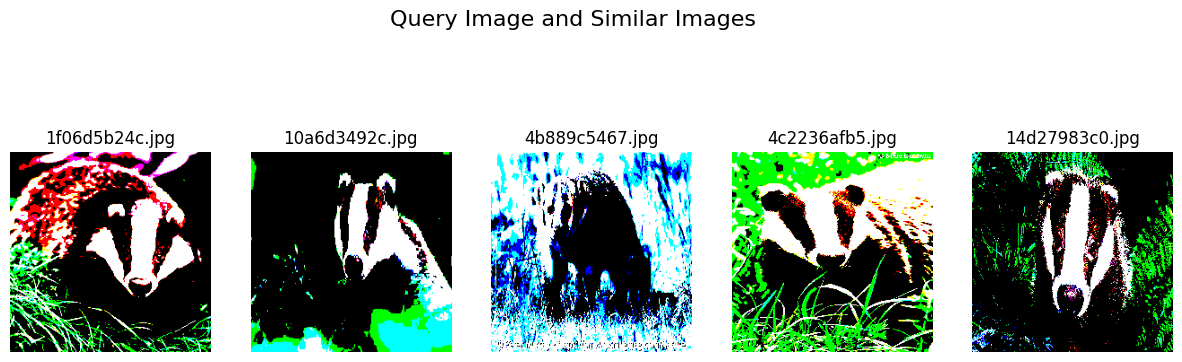

In [34]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append((filename, img_array, img))
    return images

def extract_features(model, images):
    features = []
    for img_name, img_array, _ in tqdm(images, desc="Extracting features"):
        img_array = np.expand_dims(img_array, axis=0)
        img_features = model.predict(img_array)
        features.append((img_name, img_features.flatten()))
    return features

def find_similar_images(query_features, database_features, top_n=4):
    distances = euclidean_distances([query_features], [f[1] for f in database_features])[0]
    indices = np.argsort(distances)[:top_n]
    return [database_features[i][0] for i in indices]

#function for displaying images, query and similar images
def display_images(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for ax, (img_name, img_array, img) in zip(axes, images):
        ax.imshow(img_array)  # Display the image array
        ax.set_title(img_name)
        ax.axis("off")

    plt.show()

def main():
    # Load pre-trained VGG16 model
    base_model = VGG16(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

    # Load images from the query_images and images_database folders
    query_images = load_images("/content/drive/MyDrive/data_assign_2/query_images")
    database_images = load_images("/content/drive/MyDrive/data_assign_2/images_retreival_local_database")

    # Extract features using the pre-trained model
    query_features = extract_features(model, query_images)
    database_features = extract_features(model, database_images)

    # Select a query image (for demonstration purposes, using the first query image)
    query_index = 0
    query_image_name = query_features[query_index][0]

    # Find similar images
    similar_image_names = find_similar_images(query_features[query_index][1], database_features)

    # Display results
    print(f"\nQuery Image: {query_image_name}")
    print("Top 4 Similar Images:")
    for i, image_name in enumerate(similar_image_names, start=1):
        print(f"{i}. {image_name}")

    # Display images
    display_images([(query_image_name, query_images[query_index][1], query_images[query_index][2])] +
                   [(img_name, img_array, img) for img_name, img_array, img in database_images
                    if img_name in similar_image_names],
                   "Query Image and Similar Images")

if __name__ == "__main__":
    main()

The above code although shows the images but the images are in a single row, in the code below I have tried to put the query image in row 1, and its similar images in row 2

In [35]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tqdm import tqdm
import matplotlib.pyplot as plt

Extracting features:   0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 142ms/step


Extracting features:  17%|█▋        | 1/6 [00:00<00:01,  4.98it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  50%|█████     | 3/6 [00:00<00:00,  9.37it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  83%|████████▎ | 5/6 [00:00<00:00, 11.43it/s]

1/1 [==============================] - 0s 20ms/step


Extracting features:   0%|          | 0/42 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:   5%|▍         | 2/42 [00:00<00:02, 14.49it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  10%|▉         | 4/42 [00:00<00:02, 14.53it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  14%|█▍        | 6/42 [00:00<00:02, 14.51it/s]

1/1 [==============================] - 0s 22ms/step


Extracting features:  19%|█▉        | 8/42 [00:00<00:02, 14.32it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  24%|██▍       | 10/42 [00:00<00:02, 14.64it/s]

1/1 [==============================] - 0s 18ms/step


Extracting features:  29%|██▊       | 12/42 [00:00<00:02, 14.45it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  33%|███▎      | 14/42 [00:00<00:01, 14.59it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  38%|███▊      | 16/42 [00:01<00:01, 14.85it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  43%|████▎     | 18/42 [00:01<00:01, 14.75it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  48%|████▊     | 20/42 [00:01<00:01, 14.79it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  52%|█████▏    | 22/42 [00:01<00:01, 14.91it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  57%|█████▋    | 24/42 [00:01<00:01, 14.57it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  62%|██████▏   | 26/42 [00:01<00:01, 14.40it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  67%|██████▋   | 28/42 [00:01<00:00, 14.16it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  71%|███████▏  | 30/42 [00:02<00:00, 13.59it/s]

1/1 [==============================] - 0s 21ms/step


Extracting features:  76%|███████▌  | 32/42 [00:02<00:00, 13.71it/s]

1/1 [==============================] - 0s 16ms/step


Extracting features:  81%|████████  | 34/42 [00:02<00:00, 13.79it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  86%|████████▌ | 36/42 [00:02<00:00, 13.59it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  90%|█████████ | 38/42 [00:02<00:00, 13.37it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features:  95%|█████████▌| 40/42 [00:02<00:00, 13.81it/s]

1/1 [==============================] - 0s 17ms/step


Extracting features: 100%|██████████| 42/42 [00:02<00:00, 14.16it/s]


Query Image: 1f06d5b24c.jpg
Top 4 Similar Images:
1. 14d27983c0.jpg
2. 4c2236afb5.jpg
3. 10a6d3492c.jpg
4. 4b889c5467.jpg


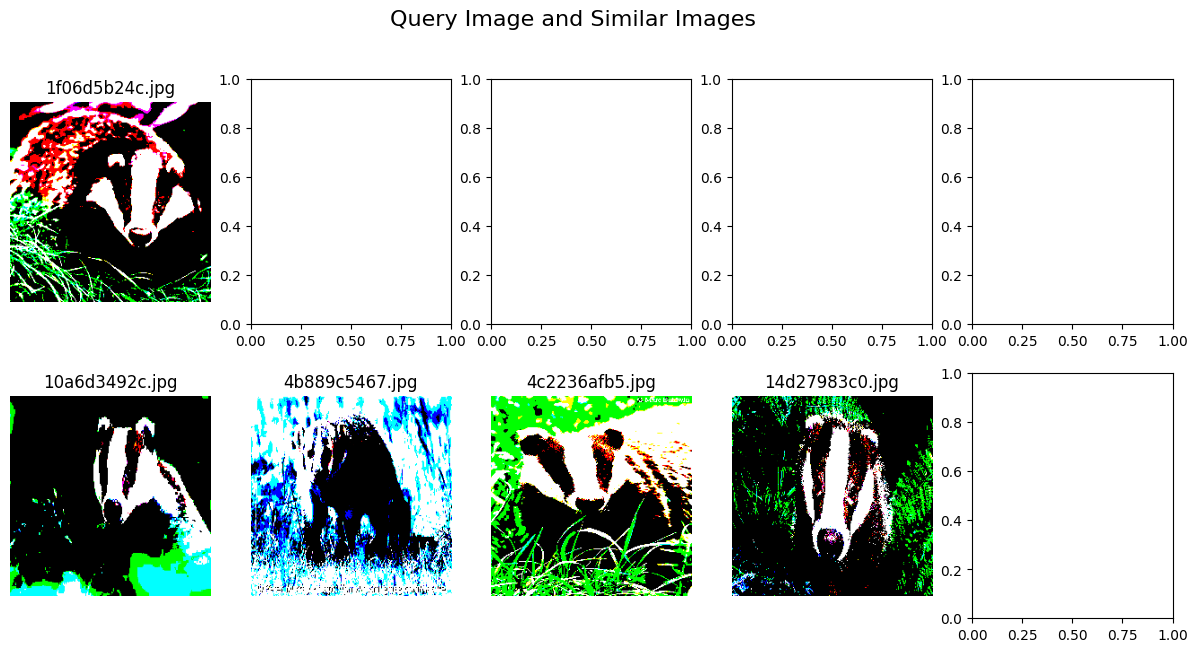

In [36]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append((filename, img_array, img))
    return images

def extract_features(model, images):
    features = []
    for img_name, img_array, _ in tqdm(images, desc="Extracting features"):
        img_array = np.expand_dims(img_array, axis=0)
        img_features = model.predict(img_array)
        features.append((img_name, img_features.flatten()))
    return features

def find_similar_images(query_features, database_features, top_n=4):
    distances = euclidean_distances([query_features], [f[1] for f in database_features])[0]
    indices = np.argsort(distances)[:top_n]
    return [database_features[i][0] for i in indices]

#display function to show query and similar image in different rows
def display_images(query_image, dataset_images, title):
    fig, axes = plt.subplots(2, len(dataset_images) + 1, figsize=(15, 7))
    fig.suptitle(title, fontsize=16)

    # Display query image
    axes[0, 0].imshow(query_image[1])
    axes[0, 0].set_title(query_image[0])
    axes[0, 0].axis("off")

    # Display dataset images
    for ax, (img_name, img_array, img) in zip(axes[1], dataset_images):
        ax.imshow(img_array)
        ax.set_title(img_name)
        ax.axis("off")

    plt.show()

def main():
    # Load pre-trained VGG16 model
    base_model = VGG16(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

    # Load images from the query_images and images_database folders
    query_images = load_images("/content/drive/MyDrive/data_assign_2/query_images")
    database_images = load_images("/content/drive/MyDrive/data_assign_2/images_retreival_local_database")

    # Extract features using the pre-trained model
    query_features = extract_features(model, query_images)
    database_features = extract_features(model, database_images)

    # Select a query image (for demonstration purposes, using the first query image)
    query_index = 0
    query_image_name = query_features[query_index][0]

    # Find similar images
    similar_image_names = find_similar_images(query_features[query_index][1], database_features)

    # Display results
    print(f"\nQuery Image: {query_image_name}")
    print("Top 4 Similar Images:")
    for i, image_name in enumerate(similar_image_names, start=1):
        print(f"{i}. {image_name}")

    # Display images
    display_images((query_image_name, query_images[query_index][1], query_images[query_index][2]),
                   [(img_name, img_array, img) for img_name, img_array, img in database_images
                    if img_name in similar_image_names],
                   "Query Image and Similar Images")

if __name__ == "__main__":
     main()